In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
csr=pd.read_csv("scrapers-old/master_dataset.csv")
csr=csr[csr["year"]!="2020-21"]


In [180]:
csr[(csr["CIN"]=="U10102OR1992GOI003038") & (csr["year"]=="2015-16")]

,csr_projects,development_sector,state,district,project_amount_outlay,amount_spent,implementation_mode,year,CIN,avg_net_profit,csr_prescribed,csr_spent,local_area_spent,company_hq,RoC,class,company_type,sub_caategory,listing_status
26394,NaN,NEC/ Not Mentioned,NEC/ Not mentioned,NEC/ Not mentioned,0.000000e+00,0.000000e+00,NaN,2015-16,U10102OR1992GOI003038,0.0,0.0,184.64,0.0,Orissa,RoC-Cuttack,Private,Govt. Company,Company limited by shares,Unlisted
26395,"Training to promote rural sports, nationally r...",Training To Promote Sports,Odisha,NEC/ Not mentioned,6.220000e+07,6.220000e+07,Directly,2015-16,U10102OR1992GOI003038,0.0,0.0,184.64,0.0,Orissa,RoC-Cuttack,Private,Govt. Company,Company limited by shares,Unlisted
26396,Rural development projects.,Rural Development Projects,Odisha,NEC/ Not mentioned,7.750000e+08,2.021000e+08,Directly,2015-16,U10102OR1992GOI003038,0.0,0.0,184.64,0.0,Orissa,RoC-Cuttack,Private,Govt. Company,Company limited by shares,Unlisted
26397,"Protection of national heritage, alt and cultu...",Art And Culture,Odisha,NEC/ Not mentioned,5.700000e+06,5.700000e+06,Directly,2015-16,U10102OR1992GOI003038,0.0,0.0,184.64,0.0,Orissa,RoC-Cuttack,Private,Govt. Company,Company limited by shares,Unlisted
26398,"Ensuring environmental sustainability, ecologi...",Agro Forestry,Odisha,NEC/ Not mentioned,1.580000e+07,1.320000e+07,Directly,2015-16,U10102OR1992GOI003038,0.0,0.0,184.64,0.0,Orissa,RoC-Cuttack,Private,Govt. Company,Company limited by shares,Unlisted
26399,"Promoting gender equality, empowering women, s...",Women Empowerment,Odisha,NEC/ Not mentioned,1.800000e+06,1.800000e+06,Directly,2015-16,U10102OR1992GOI003038,0.0,0.0,184.64,0.0,Orissa,RoC-Cuttack,Private,Govt. Company,Company limited by shares,Unlisted
26400,"Eradicating hunger, poverty and malnutrition, ...","Poverty, Eradicating Hunger, Malnutrition",Odisha,NEC/ Not mentioned,2.385200e+09,1.534300e+09,Directly,2015-16,U10102OR1992GOI003038,0.0,0.0,184.64,0.0,Orissa,RoC-Cuttack,Private,Govt. Company,Company limited by shares,Unlisted
26401,"Promoting education, including special educati...",Education,Odisha,NEC/ Not mentioned,5.970000e+07,2.710000e+07,Directly,2015-16,U10102OR1992GOI003038,0.0,0.0,184.64,0.0,Orissa,RoC-Cuttack,Private,Govt. Company,Company limited by shares,Unlisted


In [3]:
projects_data = pd.read_csv("scrapers-old/projects_data.csv")
projects_data= projects_data[["S.No.", 'CSR Project(s)',
       'Development Sector(s)', 'State', 'District', 'Project Amount Outlay',
       'Amount Spent', 'Mode of Implementation', 'year', 'CIN']]
projects_data

csr_spending= pd.read_csv("scrapers-old/csr_spending_data.csv")
csr_spending=csr_spending[['Average Net Profit',
       'CSR Prescribed Expenditure', 'CSR Spent', 'Local Area Spent', 'CIN',
       'year']]

csr_spending.year = [i[-7:] for i in csr_spending.year.str.strip()]
projects_data.year= [i[-7:] for i in projects_data.year.str.strip()]

In [4]:
data= projects_data.merge(csr_spending, on=["CIN", "year"], how="left")
data=data[data["S.No."]!="Grand Total"]
data=data.drop("S.No.", axis=1)
data

ocsr=pd.read_csv("Datasets/master data/master_data.csv")
cin = ocsr[["CIN_Number", "State_company", "RoC", "Class", "Company Type", "Sub Category","Listing Status"]]
cin=cin.drop_duplicates(keep="last")


csr_data=data.merge(cin, left_on="CIN", right_on="CIN_Number")

csr_data.columns=['csr_projects', 'development_sector', 'state', 'district',
       'project_amount_outlay', 'amount_spent', 'implementation_mode', 'year',
       'CIN', 'avg_net_profit', 'csr_prescribed', 'csr_spent',
       'local_area_spent','CIN_Number', 'company_hq', 'RoC', 'class', 'company_type',
       'sub_caategory', 'listing_status']


Text(0.5, 1.0, 'WEST BENGAL')

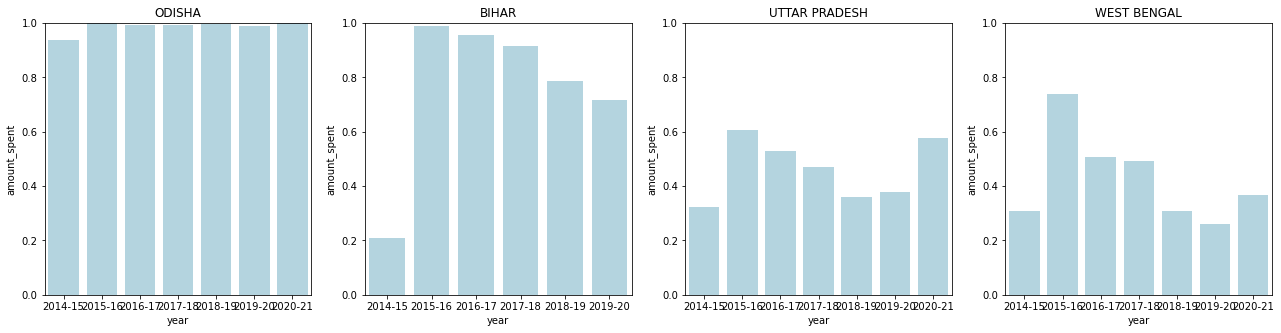

In [5]:
csr=csr_data
csr["state"]=csr.state.str.upper()
csr["company_hq"]=csr.company_hq.str.upper()
csr["company_hq"]=csr.company_hq.str.replace('ORISSA','ODISHA')

x=csr[csr["state"]==csr["company_hq"]].groupby(["company_hq", "year"])["amount_spent"].agg("sum")
y=csr.groupby(["company_hq", "year"])["amount_spent"].agg("sum")
p=x/y

fig,[ax1,ax2,ax3,ax4]= plt.subplots(ncols=4, figsize=(22,5))
data=p.reset_index()
ax1= sns.barplot(y=p["ODISHA"].values,x=p["ODISHA"].index, ax=ax1,  color="lightblue")

sns.barplot(data=data[data["company_hq"]=='ODISHA'],  x="year", y="amount_spent",ax=ax1, color="lightblue")
sns.barplot(data=data[data["company_hq"]=="BIHAR"],  x="year", y="amount_spent",ax=ax2, color="lightblue")
sns.barplot(data=data[data["company_hq"]=="UTTAR PRADESH"],  x="year", y="amount_spent",ax=ax3, color="lightblue")
sns.barplot(data=data[data["company_hq"]=="WEST BENGAL"],  x="year", y="amount_spent",ax=ax4,color="lightblue")

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])
ax3.set_ylim([0, 1])
ax4.set_ylim([0, 1])

ax1.set_title("ODISHA")
ax2.set_title("BIHAR")
ax3.set_title("UTTAR PRADESH")
ax4.set_title("WEST BENGAL")

In [6]:
csr.columns

Index(['csr_projects', 'development_sector', 'state', 'district',
       'project_amount_outlay', 'amount_spent', 'implementation_mode', 'year',
       'CIN', 'avg_net_profit', 'csr_prescribed', 'csr_spent',
       'local_area_spent', 'CIN_Number', 'company_hq', 'RoC', 'class',
       'company_type', 'sub_caategory', 'listing_status'],
      dtype='object')

In [7]:
industry_codes= pd.read_csv("industry code.csv")
rent_seeking = pd.read_csv("Datasets/rent_seeking_sectors.csv")
rent_seeking = rent_seeking.fillna(0)

csr["industry_code"]= [i[1:3] for i in csr["CIN"]]

In [8]:
csr= csr.merge(industry_codes, left_on='industry_code', right_on="code", how="left")
csr.head()

,csr_projects,development_sector,state,district,project_amount_outlay,amount_spent,implementation_mode,year,CIN,avg_net_profit,...,company_hq,RoC,class,company_type,sub_caategory,listing_status,industry_code,code,Business Description,Category
0,NaN,NEC/ Not Mentioned,NEC/ NOT MENTIONED,NEC/ Not mentioned,0.0,0.0,NaN,2014-15,L00000CH1983PLC031318,0.0,...,CHANDIGARH,RoC-Chandigarh,Public,Non-govt company,Company limited by Shares,Listed,00,NaN,NaN,NaN
1,NaN,NEC/ Not Mentioned,NEC/ NOT MENTIONED,NEC/ Not mentioned,0.0,0.0,NaN,2015-16,L00000CH1983PLC031318,0.0,...,CHANDIGARH,RoC-Chandigarh,Public,Non-govt company,Company limited by Shares,Listed,00,NaN,NaN,NaN
2,NaN,NEC/ Not Mentioned,NEC/ NOT MENTIONED,NEC/ Not mentioned,0.0,0.0,NaN,2016-17,L00000CH1983PLC031318,0.0,...,CHANDIGARH,RoC-Chandigarh,Public,Non-govt company,Company limited by Shares,Listed,00,NaN,NaN,NaN
3,NaN,NEC/ Not Mentioned,NEC/ NOT MENTIONED,NEC/ Not mentioned,0.0,0.0,NaN,2017-18,L00000CH1983PLC031318,0.0,...,CHANDIGARH,RoC-Chandigarh,Public,Non-govt company,Company limited by Shares,Listed,00,NaN,NaN,NaN
4,NaN,NEC/ Not mentioned,NEC/ NOT MENTIONED,NEC/ Not mentioned,0.0,0.0,NaN,2018-19,L00000CH1983PLC031318,0.0,...,CHANDIGARH,RoC-Chandigarh,Public,Non-govt company,Company limited by Shares,Listed,00,NaN,NaN,NaN


In [9]:
csr=csr.merge(rent_seeking, left_on="Business Description", right_on="sector", how="left")
csr.head()

,csr_projects,development_sector,state,district,project_amount_outlay,amount_spent,implementation_mode,year,CIN,avg_net_profit,...,company_type,sub_caategory,listing_status,industry_code,code,Business Description,Category,sector,is_rent_seeking,level2
0,NaN,NEC/ Not Mentioned,NEC/ NOT MENTIONED,NEC/ Not mentioned,0.0,0.0,NaN,2014-15,L00000CH1983PLC031318,0.0,...,Non-govt company,Company limited by Shares,Listed,00,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NEC/ Not Mentioned,NEC/ NOT MENTIONED,NEC/ Not mentioned,0.0,0.0,NaN,2015-16,L00000CH1983PLC031318,0.0,...,Non-govt company,Company limited by Shares,Listed,00,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NEC/ Not Mentioned,NEC/ NOT MENTIONED,NEC/ Not mentioned,0.0,0.0,NaN,2016-17,L00000CH1983PLC031318,0.0,...,Non-govt company,Company limited by Shares,Listed,00,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NEC/ Not Mentioned,NEC/ NOT MENTIONED,NEC/ Not mentioned,0.0,0.0,NaN,2017-18,L00000CH1983PLC031318,0.0,...,Non-govt company,Company limited by Shares,Listed,00,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NEC/ Not mentioned,NEC/ NOT MENTIONED,NEC/ Not mentioned,0.0,0.0,NaN,2018-19,L00000CH1983PLC031318,0.0,...,Non-govt company,Company limited by Shares,Listed,00,NaN,NaN,NaN,NaN,NaN,NaN


### Sector Analysis: Calculating the proportion of CSR from Rent Seeking

In [10]:

ocsr["industry_code"]= [i[1:3] for i in ocsr["CIN_Number"]]

In [11]:
sectors = pd.read_csv("industry code.csv")


oscr = ocsr.merge(sectors, right_on="code", left_on="industry_code", how="left")

In [12]:
orissa_csr  = oscr[oscr.State_project=="Odisha"]

csr_sector  = orissa_csr.groupby("industry_code")["Amount Spent"].agg("sum")

csr_sector = pd.DataFrame(csr_sector).reset_index()

csr_sector = csr_sector.merge(sectors, left_on="industry_code", right_on="code")

csr_sector.sort_values("Amount Spent", ascending =False)

csr_sector = csr_sector.merge(rent_seeking, left_on="Business Description", right_on="sector")

rents = csr_sector.groupby("is_rent_seeking")["Amount Spent"].agg("sum")

rents/rents.sum()

is_rent_seeking
0.0    0.234189
1.0    0.765811
Name: Amount Spent, dtype: float64

In [13]:
ocsr

,CSR Project(s),Project Amount Outlay,Amount Spent,year,Development Sector(s),State_project,District_project,Mode of Implementation,company name,CIN_Number,...,CSR Prescribed Expenditure,CSR Spent,Local Area Spent,State_company,RoC,Class,Company Type,Sub Category,Listing Status,industry_code
0,NaN,0.00,0.0,2014-15,NEC/ Not Mentioned,NEC/ Not mentioned,NEC/ Not mentioned,NaN,SAB INDUSTRIES LIMITED,L00000CH1983PLC031318,...,0.148671,0.00,0.00,Chandigarh,RoC-Chandigarh,Public,Non-govt company,Company limited by Shares,Listed,00
1,roof water proofing,500000.00,0.0,2014-15,Environmental Sustainability,Madhya Pradesh,Hoshangabad,Directly,Natraj Proteins Limited,L00153MP1990PLC006090,...,0.210000,0.21,0.01,Madhya Pradesh,RoC-Gwalior,Public,Other than Govt.,Company limited by shares,Listed,00
2,training to the poor classes of people fro emp...,800000.00,0.0,2014-15,Special Education,Madhya Pradesh,Hoshangabad,Directly,Natraj Proteins Limited,L00153MP1990PLC006090,...,0.210000,0.21,0.01,Madhya Pradesh,RoC-Gwalior,Public,Other than Govt.,Company limited by shares,Listed,00
3,education society,500000.00,0.0,2014-15,Education,Madhya Pradesh,Hoshangabad,Directly,Natraj Proteins Limited,L00153MP1990PLC006090,...,0.210000,0.21,0.01,Madhya Pradesh,RoC-Gwalior,Public,Other than Govt.,Company limited by shares,Listed,00
4,public waiting hall,500000.00,0.0,2014-15,Rural Development Projects,Madhya Pradesh,Hoshangabad,Other Implementing Agency,Natraj Proteins Limited,L00153MP1990PLC006090,...,0.210000,0.21,0.01,Madhya Pradesh,RoC-Gwalior,Public,Other than Govt.,Company limited by shares,Listed,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201044,S Cube Infra,200000.00,200000.0,2018-19,Rural development projects,Telangana,NEC/ Not mentioned,Directly by company,ASIAN INSTITUTE OF GASTROENTEROLOGY PRIVATE LI...,U99999TG1994PTC018352,...,1.940000,1.64,1.64,Telangana,RoC-Hyderabad,Private,Other than Govt.,Company limited by Shares,Unlisted,99
201045,Lake View Sports Foundation,4200000.00,4200000.0,2018-19,Rural development projects,Telangana,NEC/ Not mentioned,Directly by company,ASIAN INSTITUTE OF GASTROENTEROLOGY PRIVATE LI...,U99999TG1994PTC018352,...,1.940000,1.64,1.64,Telangana,RoC-Hyderabad,Private,Other than Govt.,Company limited by Shares,Unlisted,99
201046,Research for promoting health care including p...,12000000.00,12000000.0,2018-19,Rural development projects,Telangana,NEC/ Not mentioned,Other implementing agencies,ASIAN INSTITUTE OF GASTROENTEROLOGY PRIVATE LI...,U99999TG1994PTC018352,...,1.940000,1.64,1.64,Telangana,RoC-Hyderabad,Private,Other than Govt.,Company limited by Shares,Unlisted,99
201047,Contribution to Akshaya Patra,1207000.00,1207000.0,2018-19,"Poverty, Eradicating Hunger, Malnutrition",Telangana,NEC/ Not mentioned,By Trusts/Societies/Section 8 company set up b...,ECIL-RAPISCAN LIMITED,U99999TG1995PLC019129,...,0.120000,0.12,0.00,Telangana,RoC-Hyderabad,Public,Other than Govt.,Company limited by shares,Unlisted,99


In [14]:
ocsr = oscr.merge(rent_seeking, left_on="Business Description", right_on="sector", how="left")

''

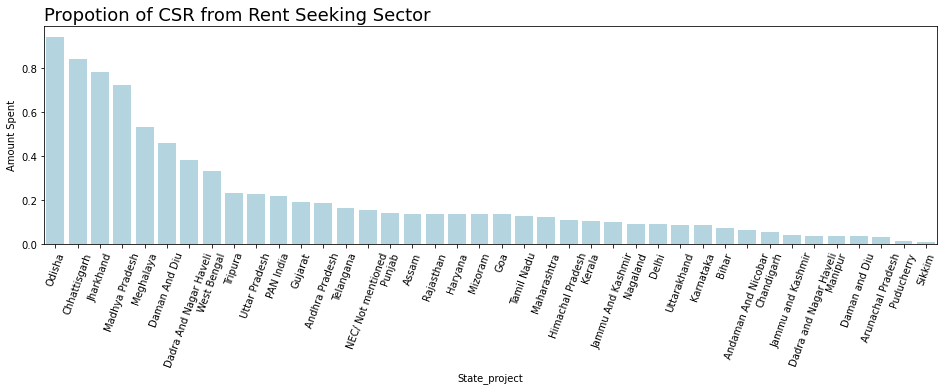

In [17]:
rents = ocsr[ocsr["Class"]=="Private"].groupby(["State_project", "is_rent_seeking"])["Amount Spent"].agg("sum")
"""rents=rents.reset_index()
rents"""

rents=rents/rents.groupby(level=0).sum()

rents=rents.reset_index()
rents=rents[rents["is_rent_seeking"]==1]
rents=rents.sort_values("Amount Spent", ascending=False)

fig, ax=plt.subplots(figsize=(16,4))

sns.barplot(data=rents, x="State_project", y="Amount Spent", color="lightblue")

plt.xticks(rotation=70)

plt.title("Propotion of CSR from Rent Seeking Sector", fontsize=18, loc="left")
""

### Do Companies in rent-seeking sector out spend their Prescribed CSR?

''

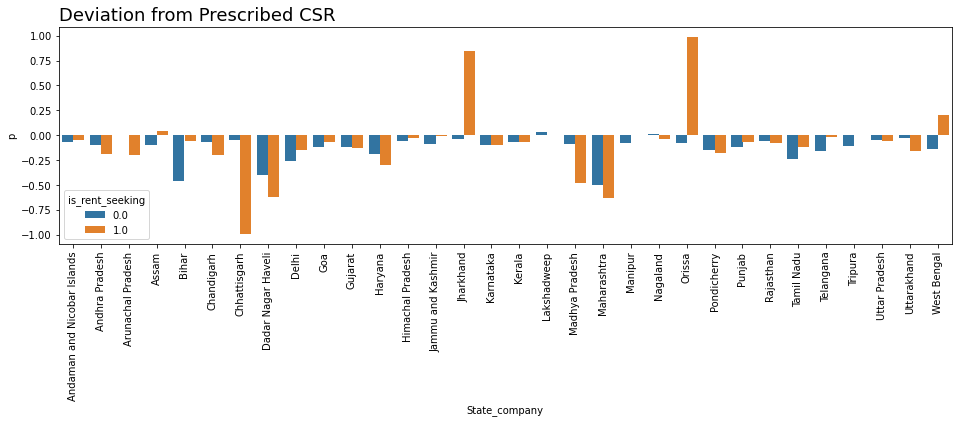

In [200]:
company_data=ocsr[['company name', 'CIN_Number', "year",
       'Average Net Profit', 'CSR Prescribed Expenditure', 'CSR Spent',
       'Local Area Spent', 'State_company', 'RoC', 'Class', 'Company Type',
       'Sub Category', 'Listing Status', 'industry_code', 'code',
       'Business Description', 'Category', 'sector', 'is_rent_seeking',
       'level2']]


company_data= company_data.drop_duplicates()
company_data=company_data[company_data["Class"]=="Private"]


company_data["p"]=company_data["CSR Spent"] - company_data["CSR Prescribed Expenditure"]

company_data = company_data.drop([8158,120203, 19992, 16830, 16830,19098, 39136, 119910, 55448, 14663,22426, 23578, 196919,
                                 61687,197674, 16830, 51192, 34726, 14549, 43047, 121425,119910]) #119910,6231 

out_spending = company_data.groupby(["State_company", "is_rent_seeking"])["p"].agg("mean")
out_spending = out_spending.reset_index()


out_spending=out_spending[~ out_spending["State_company"].isin([ "Daman and Diu", "Meghalaya"])]

fig, ax=plt.subplots(figsize=(16,4))

sns.barplot(data=out_spending, x="State_company", y="p", hue="is_rent_seeking" )#color="lightblue"
plt.xticks(rotation=90)

plt.title("Deviation from Prescribed CSR", fontsize=18, loc="left")

fig.text(0.8, -0.4, "", ha='center', color="grey")
""


In [199]:
company_data=ocsr[['company name', 'CIN_Number', "year",
       'Average Net Profit', 'CSR Prescribed Expenditure', 'CSR Spent',
       'Local Area Spent', 'State_company', 'RoC', 'Class', 'Company Type',
       'Sub Category', 'Listing Status', 'industry_code', 'code',
       'Business Description', 'Category', 'sector', 'is_rent_seeking',
       'level2']]


company_data= company_data.drop_duplicates()
company_data=company_data[company_data["Class"]=="Private"]
#company_data=company_data[company_data["year"]=="2014-2015"]
#company_data=company_data[company_data["year"]=="2015-16"]
#company_data=company_data[company_data["year"]=="2016-17"]
#company_data=company_data[company_data["year"]=="2017-18"]
#company_data=company_data[company_data["year"]=="2018-19"]



d=company_data[company_data['State_company']=="Chhattisgarh"]  
d=d[d["is_rent_seeking"]==1]
d["d"]=d["CSR Spent"]-d["CSR Prescribed Expenditure"]  
d["d"]=d["d"].abs()
d.sort_values("d", ascending=False)[["CIN_Number","Average Net Profit","CSR Prescribed Expenditure", "CSR Spent", "d", "Class", "company name", "year"]][:30]

,CIN_Number,Average Net Profit,CSR Prescribed Expenditure,CSR Spent,d,Class,company name,year
119910,U10102CT1985GOI003161,0.00,93.460000,0.00,93.460000,Private,SOUTH EASTERN COALFIELDS LIMITED,2017-18
6231,U10102CT1985GOI003161,6498.64,129.970000,40.43,89.540000,Private,South Eastern Coalfields Limited,2014-15
166800,U10102CT1985GOI003161,4052.13,81.040000,83.59,2.550000,Private,SOUTH EASTERN COALFIELDS LIMITED,2018-19
90241,U45101CT1995PTC002097,6.29,0.130000,0.54,0.410000,Private,SALARPURIA PROFIN PRIVATE LIMITED,2016-17
91962,U45203CT1997PTC012220,18.71,0.370000,0.00,0.370000,Private,DURG SHIVNATH EXPRESSWAYS PRIVATE LIMITED,2016-17
136920,U45203CT1997PTC012220,16.97,0.340000,0.00,0.340000,Private,DURG SHIVNATH EXPRESSWAYS PRIVATE LIMITED,2017-18
134867,U40109CT2002PTC015421,9.83,0.200000,0.00,0.200000,Private,SHRI ASHUTOSH STRUCTURES PRIVATE LIMITED,2017-18
135992,U45201CT1978PTC001456,0.00,0.200000,0.00,0.200000,Private,BSBK PRIVATE LIMITED,2017-18
183837,U45203CT1999PTC013832,8.09,0.160000,0.00,0.160000,Private,CHOUHAN HOUSING PRIVATE LIMITED,2018-19
136927,U45203CT2003PTC015609,0.00,0.160000,0.00,0.160000,Private,R.K.TRANSPORT AND CONSTRUCTIONS PRIVATELIMITED,2017-18


In [158]:
company_data=ocsr[['company name', 'CIN_Number', "year",
       'Average Net Profit', 'CSR Prescribed Expenditure', 'CSR Spent',
       'Local Area Spent', 'State_company', 'RoC', 'Class', 'Company Type',
       'Sub Category', 'Listing Status', 'industry_code', 'code',
       'Business Description', 'Category', 'sector', 'is_rent_seeking',
       'level2']]


company_data= company_data.drop_duplicates()

company_data.loc[[8158,120203, 19992]]

,company name,CIN_Number,year,Average Net Profit,CSR Prescribed Expenditure,CSR Spent,Local Area Spent,State_company,RoC,Class,Company Type,Sub Category,Listing Status,industry_code,code,Business Description,Category,sector,is_rent_seeking,level2
8158,INDO AUSTRALIAN HOSE MANUFACTURINGPRIVATE LIMITED,U23203JH2005PTC011381,2014-15,0.0,7163.43,0.0,0.0,Jharkhand,RoC-Jharkhand,Private,Non-govt company,Company limited by Shares,Unlisted,23,23,"Manufacture of coke, refined petroleum product...","Manufacturing (Metals & Chemicals, and product...","Manufacture of coke, refined petroleum product...",1.0,0.0
120203,CENTRAL COALFIELDS LIMITED,U10200JH1956GOI000581,2017-18,0.0,54.88,0.0,0.0,Jharkhand,RoC-Jharkhand,Private,Govt. Company,Company limited by shares,Unlisted,10,10,"Mining of coal and lignite, extraction of peat",Mining & Quarrying,"Mining of coal and lignite, extraction of peat",1.0,0.0
19992,SRI GAYATRI MINERALS PRIVATE LIMITED,U70109WB2000PTC090993,2014-15,0.0,2588.26,0.0,0.0,West Bengal,RoC-Kolkata,Private,Non-govt company,Company limited by Shares,Unlisted,70,70,Real estate activities,Real Estate and Renting,Real estate activities,1.0,0.0


''

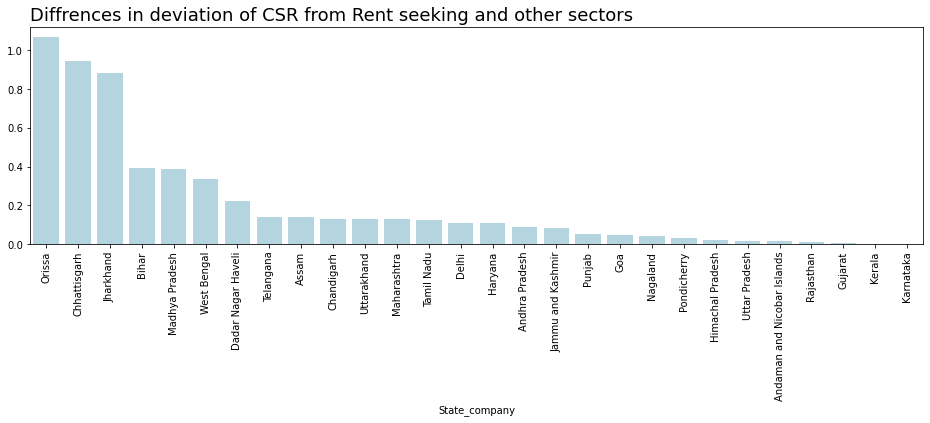

In [192]:
df=out_spending
df.index=df.State_company

diff = df[df["is_rent_seeking"]==1].p - df[df["is_rent_seeking"]==0].p

diff = diff.abs().sort_values(ascending=False).dropna()


fig, ax=plt.subplots(figsize=(16,4))

sns.barplot(data=out_spending, x=diff.index, y=diff.values, color="lightblue" )#color="lightblue"
plt.xticks(rotation=90)

plt.title("Diffrences in deviation of CSR from Rent seeking and other sectors", fontsize=18, loc="left")

""


In [197]:
r = company_data.groupby(["State_company", "is_rent_seeking"])["CSR Spent"].agg("sum")/company_data.groupby(["State_company", "is_rent_seeking"])["CSR Prescribed Expenditure"].agg("sum")

r=r.reset_index()
r.index=r.State_company

r=r[r["is_rent_seeking"]==1][0]/r[r["is_rent_seeking"]==0][0]

r.sort_values().dropna()

State_company
Andaman and Nicobar Islands      0.000000
Dadar Nagar Haveli               0.234622
Maharashtra                      0.441246
Nagaland                         0.451128
Uttarakhand                      0.583015
Chandigarh                       0.617559
Uttar Pradesh                    0.634842
Haryana                          0.669903
Pondicherry                      0.674683
Kerala                           0.716165
Andhra Pradesh                   0.748622
Karnataka                        0.769470
Bihar                            0.788151
Rajasthan                        0.809222
Goa                              0.845739
Punjab                           0.943023
Delhi                            0.955206
Gujarat                          1.059280
Chhattisgarh                     1.070238
Tamil Nadu                       1.077620
Himachal Pradesh                 1.085786
Jharkhand                        1.272488
Meghalaya                        1.378740
Madhya Pradesh      

### Archives